In [1]:
import os
import glob
import sys

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [58]:
base_path = '../experiments/'
model = 'resnet18'

METHODS = {
#     "ig": "ig",
    "sailency": "sailency",
    "gradcam": "gradcam",
    "deconv": "deconv",
    "gbp": "gbp",
}

SPLIT_OPTIONS = ["100%", "80%", "60%", "40%", "20%"]

DATASETS = {
    "edible-plants": "edible-plants",
#     "food101": "food101",
    "marvel": "marvel",
    "plant-data": "plant-data",
    "stanford-dogs": "stanford-dogs",
}
ACC = {
    "edible-plants":{
        "100%": "0.81",
        "80%": "0.79",
        "60%": "0.77",
        "40%": "0.74",
        "20%": "0.55"
    },
    "food101": {
        "100%": "0.76",
        "80%": "0.75",
        "60%": "0.74",
        "40%": "0.71",
        "20%": "0.67"
    },
    "marvel": {
        "100%": "0.68",
        "80%": "0.69",
        "60%": "0.68",
        "40%": "0.64",
        "20%": "0.60"
    },
    "plant-data": {
        "100%": "0.89",
        "80%": "0.86",
        "60%": "0.83",
        "40%": "0.79",
        "20%": "0.72"
    },
    "stanford-dogs": {
        "100%": "0.77",
        "80%": "0.78",
        "60%": "0.77",
        "40%": "0.76",
        "20%": "0.73"
    },
}
F1 = {
    "edible-plants":{
        "100%": "0.77",
        "80%": "0.73",
        "60%": "0.72",
        "40%": "0.66",
        "20%": "0.49"
    },
    "food101": {
        "100%": "0.67",
        "80%": "0.75",
        "60%": "0.73",
        "40%": "0.71",
        "20%": "0.66"
    },
    "marvel": {
        "100%": "0.68",
        "80%": "0.69",
        "60%": "0.67",
        "40%": "0.63",
        "20%": "0.60"
    },
    "plant-data": {
        "100%": "0.89",
        "80%": "0.86",
        "60%": "0.82",
        "40%": "0.79",
        "20%": "0.70"
    },
    "stanford-dogs": {
        "100%": "0.77",
        "80%": "0.77",
        "60%": "0.76",
        "40%": "0.76",
        "20%": "0.72"
    },
}

fig_size = (30,16)
title_font=32
label_font=28
marker_size=18

plt.rcParams.update({'font.size': 22})

In [32]:
scores = []
for dataset in DATASETS.keys():
    for method in METHODS.keys():
        for data_split in SPLIT_OPTIONS:
            path = os.path.join(base_path, dataset, f"{model}-{data_split}", method, f"{model}-{dataset}-{method}.csv")
            df = pd.read_csv(path)
            df = df.mean(axis=0)
            scores.append([model, dataset, data_split, method, ACC[dataset][data_split], F1[dataset][data_split], df['# infidelity'], df['sensitivity']])
       

In [40]:
scores_df = pd.DataFrame(np.array(scores), columns=['model', 'dataset', 'data_split', 'method', 'acc', 'f1', 'infidelity', 'sensitivity'])
scores_df['acc'] = scores_df['acc'].map(lambda x: float(x))
scores_df['f1'] = scores_df['f1'].map(lambda x: float(x))

In [41]:
scores_df[scores_df['method'] == 'gradcam']

,model,dataset,data_split,method,acc,f1,infidelity,sensitivity
5,resnet18,edible-plants,100%,gradcam,0.81,0.77,0.0003116470902774205,1.267365534267118
6,resnet18,edible-plants,80%,gradcam,0.79,0.73,0.0002410051678746259,1.2778932875202549
7,resnet18,edible-plants,60%,gradcam,0.77,0.72,0.00023317889759827295,1.2498358170832358
8,resnet18,edible-plants,40%,gradcam,0.74,0.66,0.0002016799885290487,1.2545315777101824
9,resnet18,edible-plants,20%,gradcam,0.55,0.49,0.00015485075154203747,1.2453156723130134
25,resnet18,marvel,100%,gradcam,0.68,0.68,0.00026447823131371467,1.28563232815715
26,resnet18,marvel,80%,gradcam,0.69,0.69,0.00027351485827331997,1.203624139736074
27,resnet18,marvel,60%,gradcam,0.68,0.67,0.0002903177243697549,1.2123001414762105
28,resnet18,marvel,40%,gradcam,0.64,0.63,0.00024652602027377247,1.2937520339325104
29,resnet18,marvel,20%,gradcam,0.60,0.60,0.0001818801907300847,1.3173050857964745


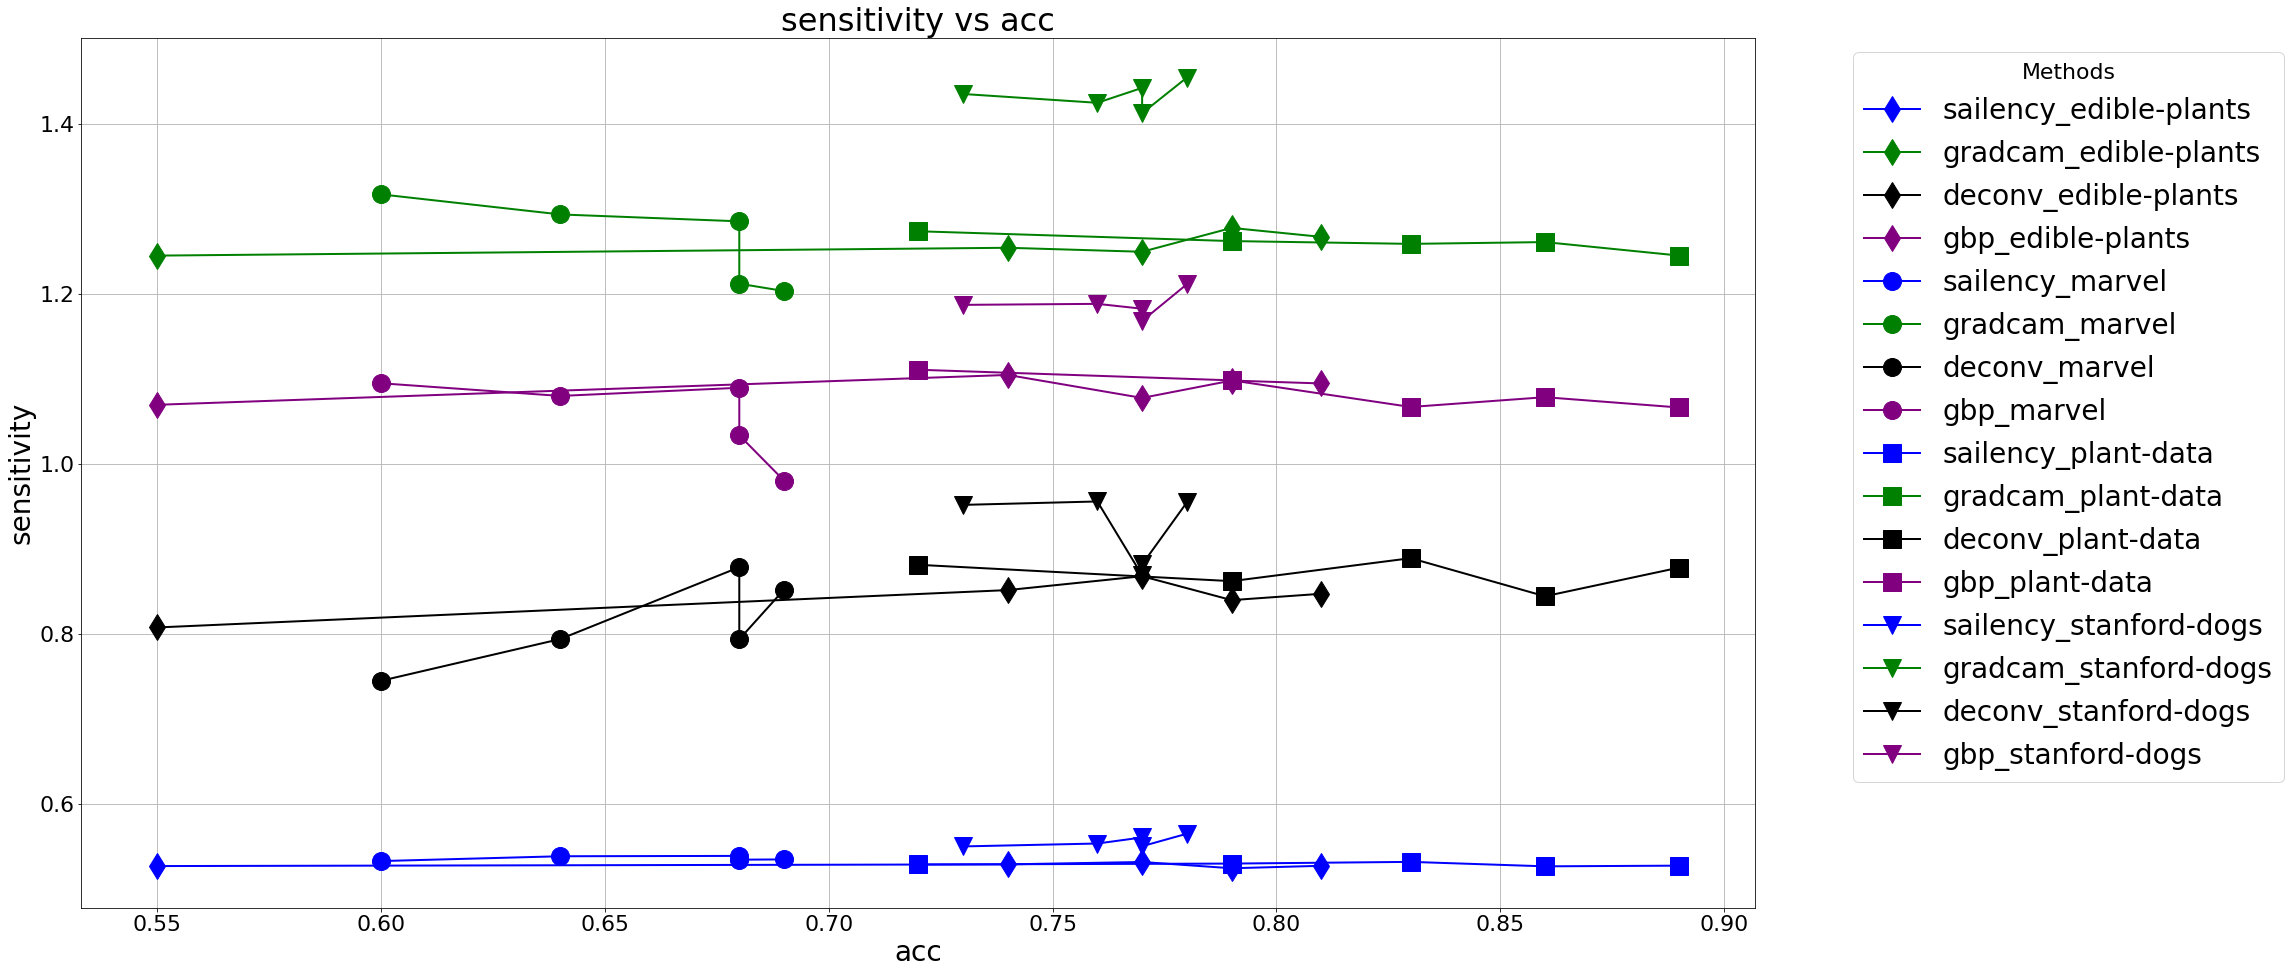

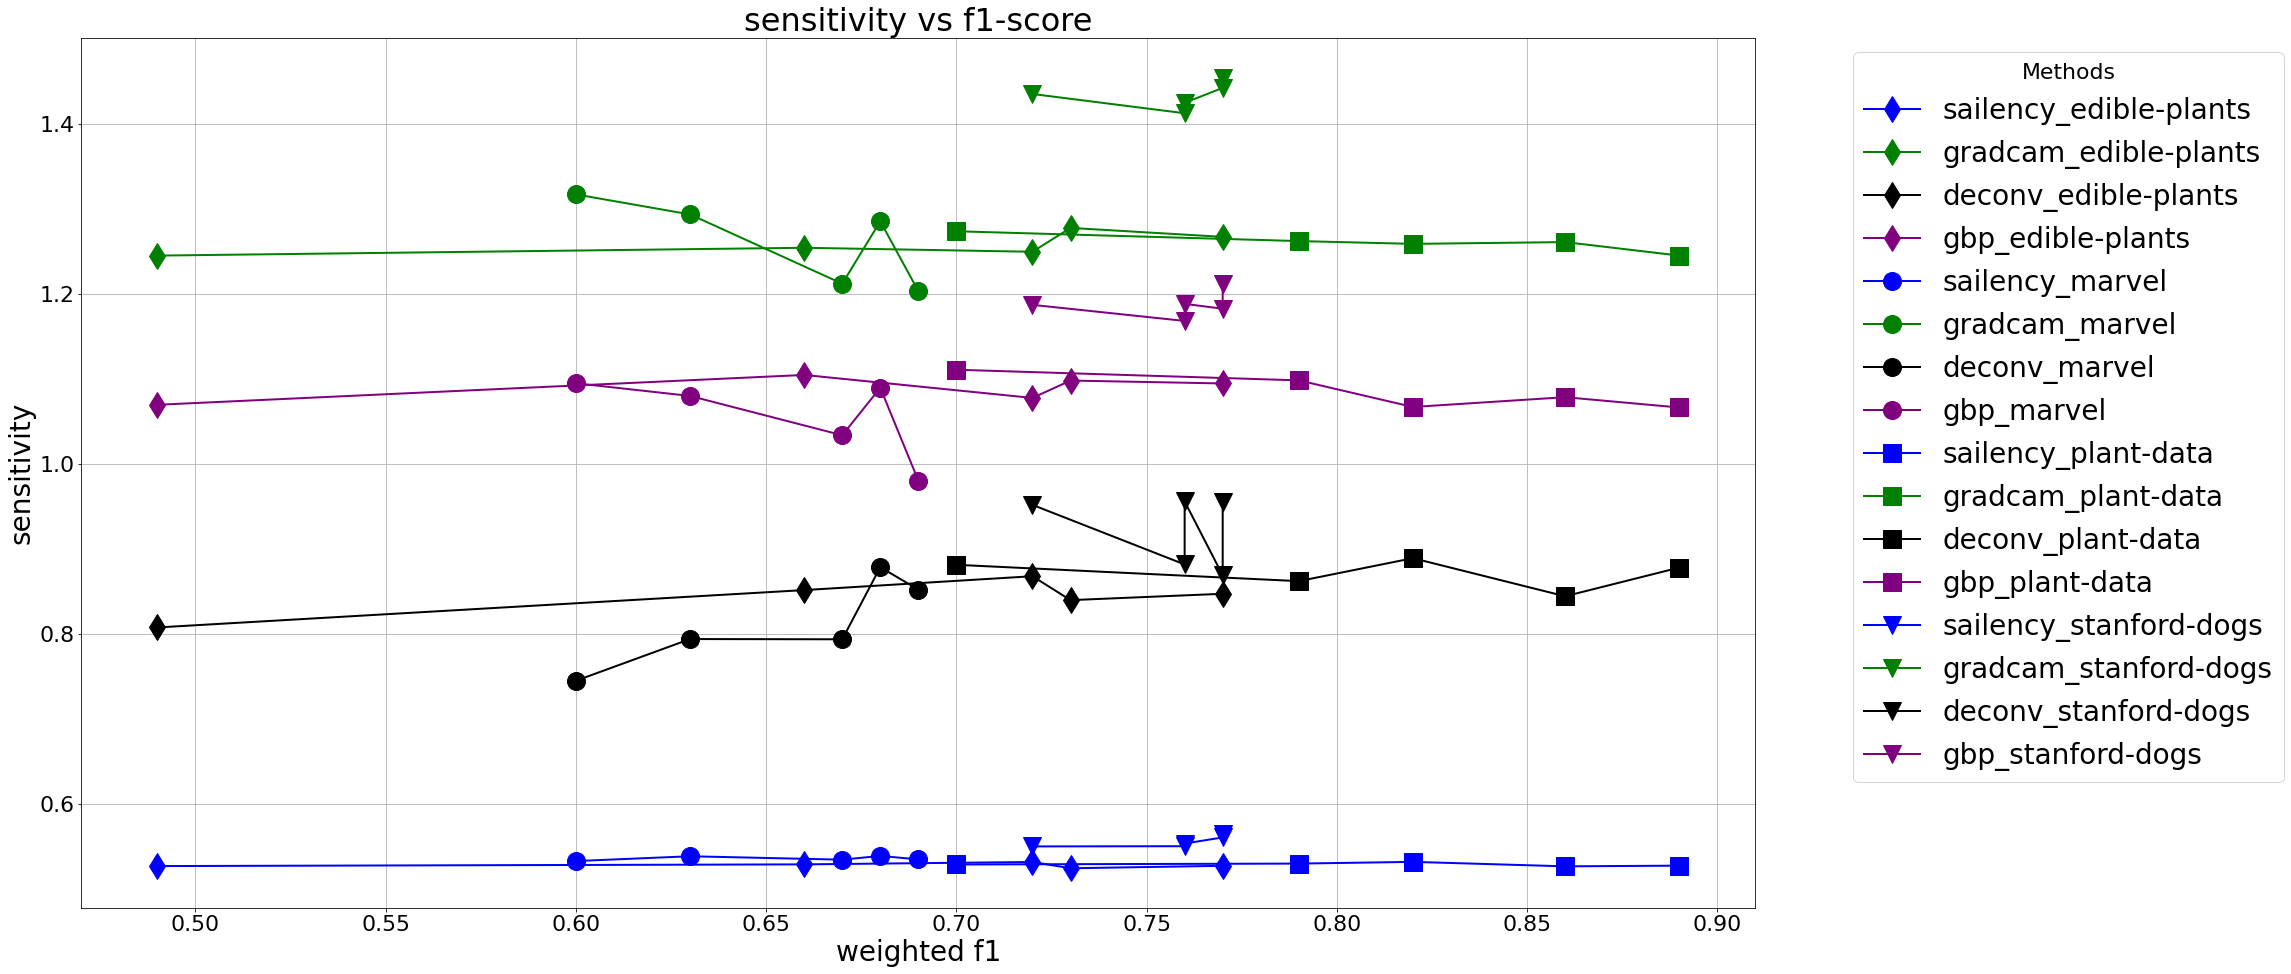

In [61]:
COLORS = {
    "ig": "red",
    "sailency": "blue",
    "gradcam": "green",
    "deconv": "black",
    "gbp": "purple",
}
MARKERS = {
    "edible-plants": "d",
#     "food101": "X",
    "marvel": "o",
    "plant-data": "s",
    "stanford-dogs": "v",
}
plt.figure(figsize=fig_size) 

for dataset in DATASETS.keys():
    for method in METHODS.keys():
        filter_df = scores_df[(scores_df['method'] == method) & (scores_df['dataset'] == dataset)].sort_values(['acc'])
        filter_df['sensitivity'] = filter_df['sensitivity'].map(lambda x: float(x))

        plt.plot(filter_df['acc'], filter_df['sensitivity'], color=COLORS[method], marker=MARKERS[dataset], label=method+'_'+dataset, linewidth=2, markersize=marker_size)
    
plt.title('sensitivity vs acc', fontsize=title_font)
plt.xlabel('acc', fontsize=label_font)
plt.ylabel('sensitivity', fontsize=label_font)
plt.legend( title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=label_font)
plt.grid(True)
plt.show()

plt.figure(figsize=fig_size) 

for dataset in DATASETS.keys():
    for method in METHODS.keys():
        filter_df = scores_df[(scores_df['method'] == method) & (scores_df['dataset'] == dataset)].sort_values(['f1'])
        filter_df['sensitivity'] = filter_df['sensitivity'].map(lambda x: float(x))

        plt.plot(filter_df['f1'], filter_df['sensitivity'], color=COLORS[method], marker=MARKERS[dataset], label=method+'_'+dataset, linewidth=2, markersize=marker_size)
    
plt.title('sensitivity vs f1-score', fontsize=title_font)
plt.xlabel('weighted f1', fontsize=label_font)
plt.ylabel('sensitivity', fontsize=label_font)
plt.legend( title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=label_font)
plt.grid(True)
plt.show()

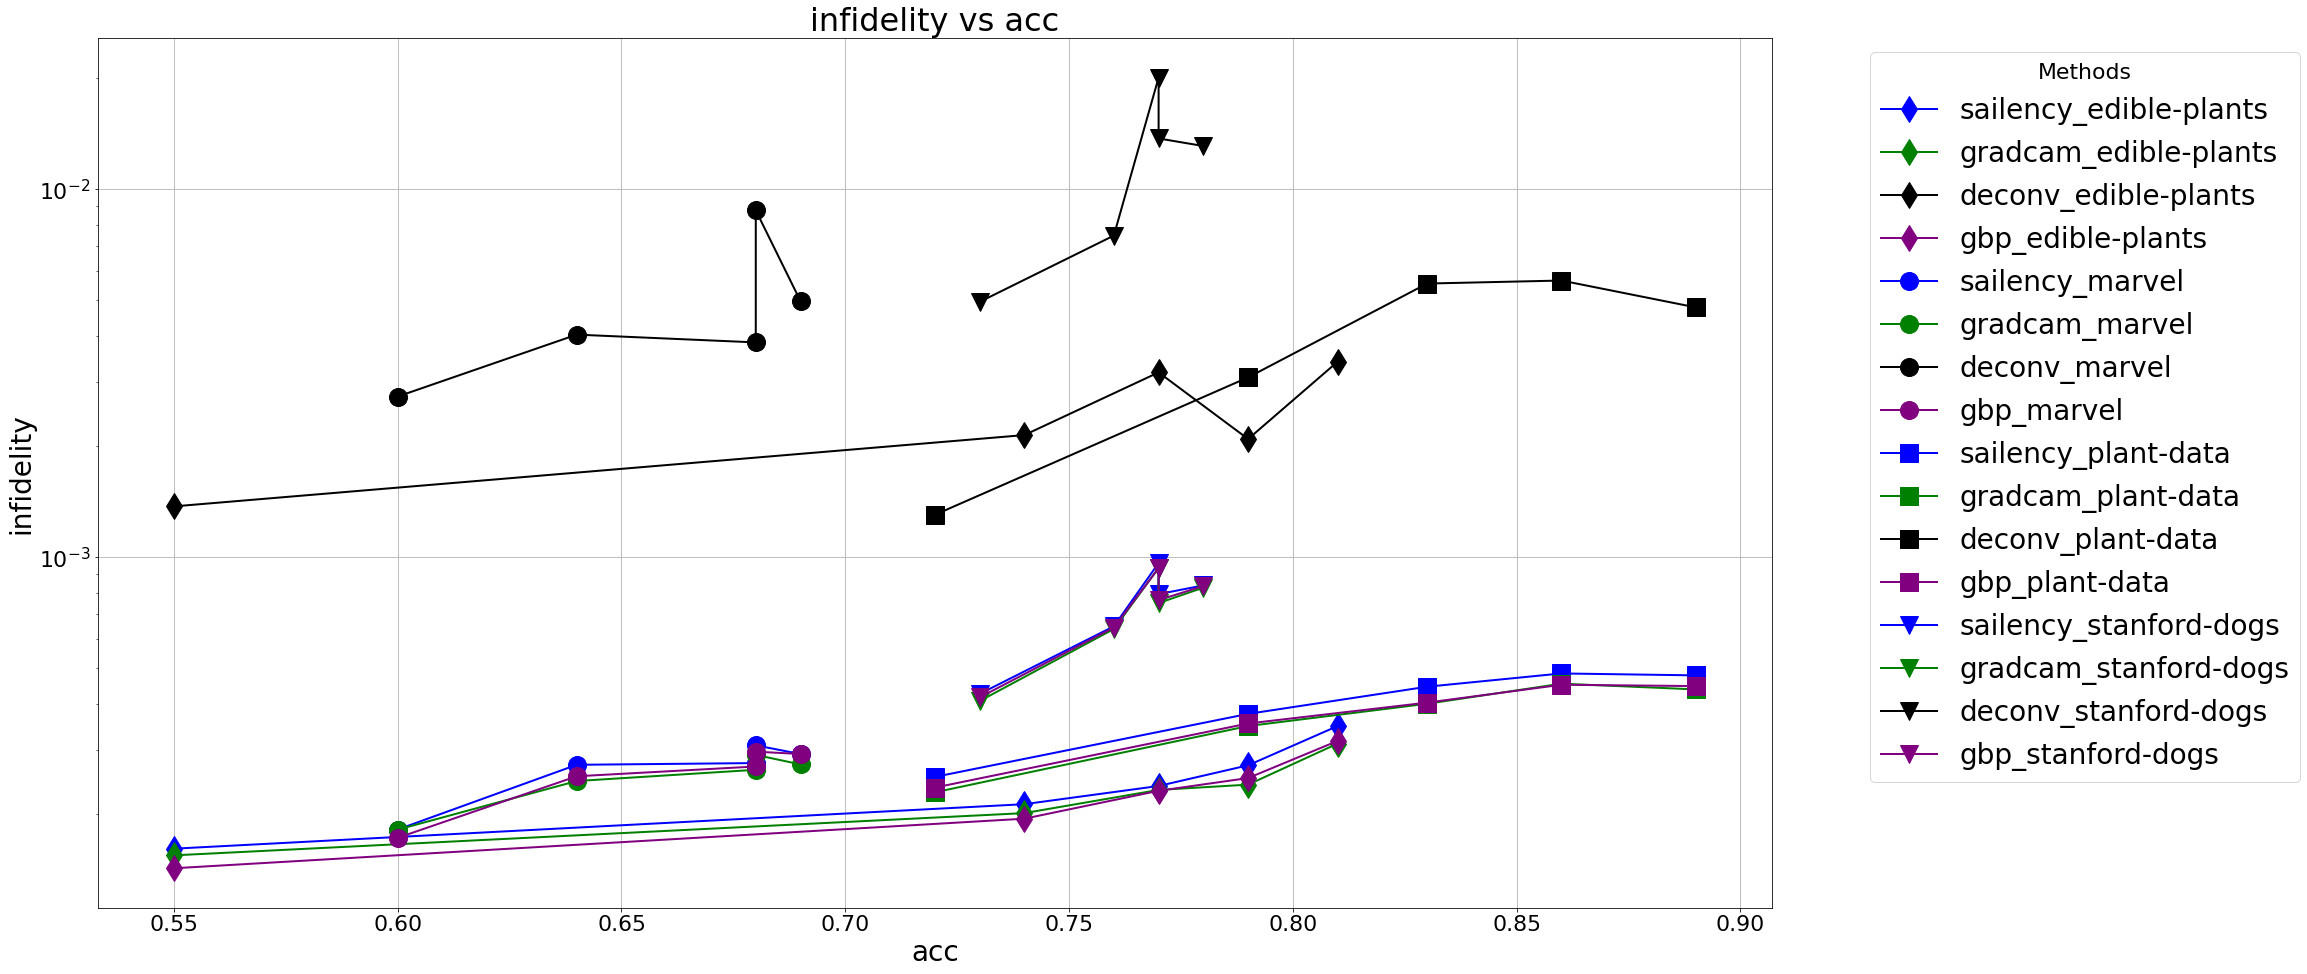

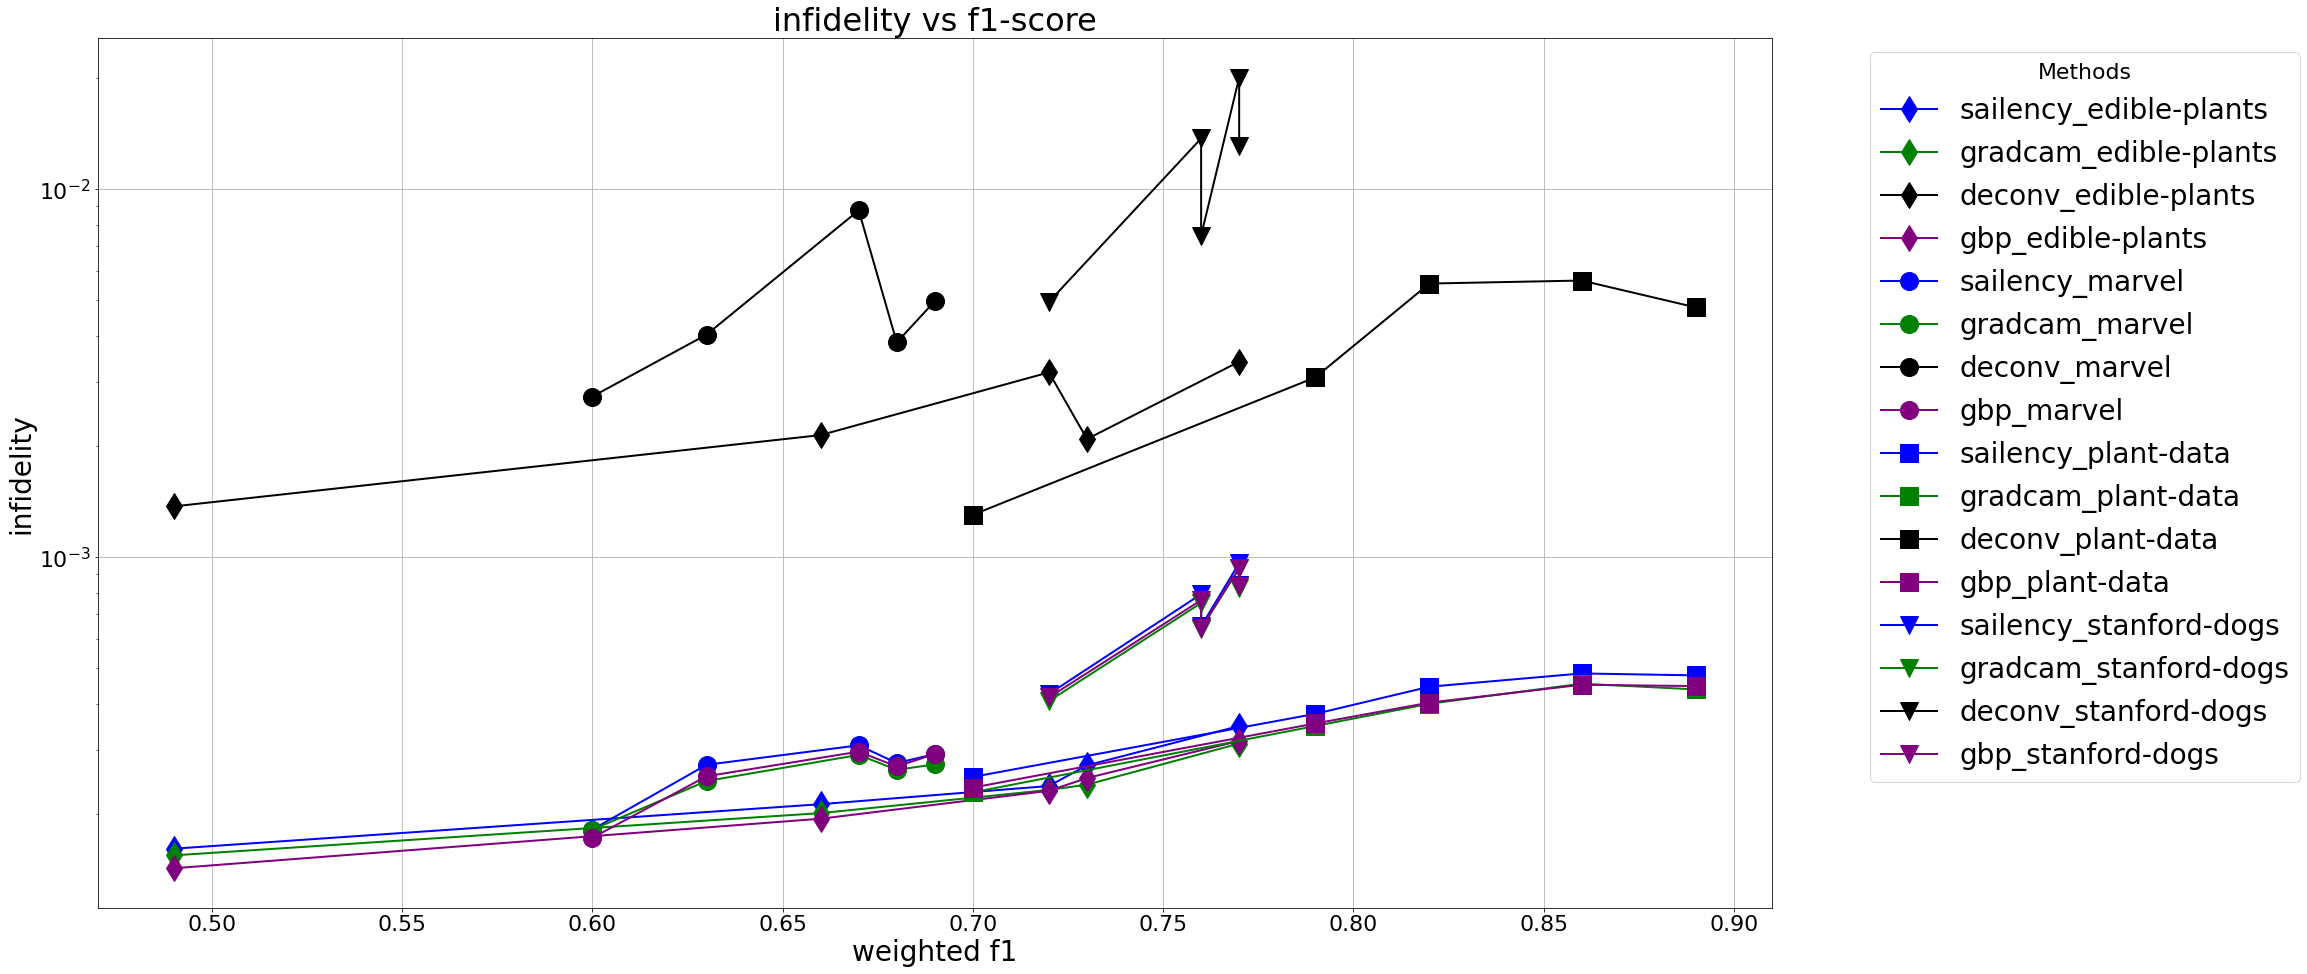

In [62]:

plt.figure(figsize=fig_size) 
for dataset in DATASETS.keys():
    for method in METHODS.keys():
        filter_df = scores_df[(scores_df['method'] == method) & (scores_df['dataset'] == dataset)].sort_values(['acc'])
        filter_df['infidelity'] = filter_df['infidelity'].map(lambda x: float(x))

        plt.plot(filter_df['acc'], filter_df['infidelity'], color=COLORS[method], marker=MARKERS[dataset], label=method+'_'+dataset, linewidth=2, markersize=marker_size)
    
plt.title('infidelity vs acc', fontsize=title_font)
plt.xlabel('acc', fontsize=label_font)
plt.ylabel('infidelity', fontsize=label_font)
plt.yscale('log')
plt.legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=label_font)
plt.grid(True)
plt.show()

plt.figure(figsize=fig_size) 
for dataset in DATASETS.keys():
    for method in METHODS.keys():
        filter_df = scores_df[(scores_df['method'] == method) & (scores_df['dataset'] == dataset)].sort_values(['f1'])
        filter_df['infidelity'] = filter_df['infidelity'].map(lambda x: float(x))

        plt.plot(filter_df['f1'], filter_df['infidelity'], color=COLORS[method], marker=MARKERS[dataset], label=method+'_'+dataset, linewidth=2, markersize=marker_size)
    
plt.title('infidelity vs f1-score', fontsize=title_font)
plt.xlabel('weighted f1', fontsize=label_font)
plt.ylabel('infidelity', fontsize=label_font)
plt.yscale('log')
plt.legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=label_font)
plt.grid(True)
plt.show()